## Введение

Пингвины — милейшие существа, удивительные и по-своему прекрасные. Пушистые, упитанные, неуклюжие, эти птицы вызывают массу положительных впечатлений. Недаром они часто становятся персонажами различных мультфильмов — многие считают, что пингвин — это нечто пушистое, тёплое и толстое, примерно как домашний кот. Это, конечно, не так…

Пингвин — это нелетающая птица, которая относится к отряду пингвинообразные, семейству пингвиновые (лат. Spheniscidae). Это единственные в мире птицы, которые могут ходить в вертикальном положении.
Они используют свои крылья чтобы плавать под водой, но не могут летать в воздухе.
Почему пингвины не летают?

Этот насущный вопрос разрешили учёные из США и Канады. В ходе исследований они выяснили, что пингвины утратили способность к полёту в процессе эволюции. Чтобы улучшить способность к нырянию, птицам пришлось уменьшить размер крыльев или же увеличить габариты тела. И то, и другое, в конечном итоге, сделало пингвиний полёт невозможным.

Несмотря на это, пингвины — отличные пловцы. В отличие от летающих птиц, они не обладают полыми костями. Всё тело пингвинов, в особенности крылья, напоминающие плавники, приспособлены для быстрого и маневренного плавания. Работая крыльями, как винтами, эти нелёгкие птицы способны развивать в воде скорость до 50 км/час и буквально "выстреливать" из воды на берег. Помимо этого, некоторые виды пингвинов также умеют нырять на глубину до 500 метров.

Пингвины – очаровательные и дружелюбные создания, они забавно ходят, изящны и быстры в воде. У большинства людей они вызывают симпатию и улыбку. Но их численность с каждым годом постепенно сокращается, в том числе и из-за человека.

За последние 50 лет численность пингвинов в Антарктиде снизилась почти на 80%. Ученые давно забили тревогу: еще каких-то полвека и эти птицы могут исчезнуть. Уже сейчас они погибают целыми колониями.
Антарктические пингвины по большей части населяют побережье самого южного континента Земли - Антарктиды. 

Глобальное потепление, сокращение площади льда, изменение кормовой базы может привести к исчезновению некоторых видов пингвинов. Эти причины поставили популяцию уникальных птиц под удар.

Исчезает криль, который является главной кормовой базой мелких пингвинов. Вместе с тем экосистеме пингвинов угрожает и освоение Антарктики и Южного океана. Так, среди 18 видов пингвинов к началу 21 века три вида были признаны находящимися на грани вымирания, семь видов находятся под угрозой исчезновения.

В этом проекте я рассмотрю пингвинов по свойствам и характеристикам в их немногочисленности. 

__Содержание:__


1. Загрузка данных


2. Проверка данных


3. Описание переменных


 -  Анализ переменных:

 1) Категориальные переменные
 2) Числовые переменные
 
4. Базовый анализ данных


5. Обнаружение выбросов


6. Работа с отсутствующими значениями

 1) Поиск недостающих значений
 
 2) Заполнение пропущенных значений
 
 
7. Визуализация


- виды -- culmen_length_mm/culmen_depth_mm
- остров -- culmen_length_mm/culmen_depth_mm
- виды --flipper_length_mm
- остров --секс--флиппер_длина_мм
- виды -- body_mass_g
- остров --body_mass_g
- остров-пол-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g
- виды-пол-culmen_length_mm/culmen_depth_mm/flipper_length_mm/body_mass_g

8. Корреляция между culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g


9. Регрессионный анализ


10. Создание и обучение модели кластеризации K-средних помощью scikit-learn.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [15]:
sns.set(rc = {"figure.dpi" : 150})
sns.set(rc = {"figure.figsize": (9,3)})
custom_palette = ["#87CEFA","#1E90FF","#0000CD","#00008B"]
sns.set_palette(custom_palette)
#код для визуализации на графиках

## Загрузка данных

In [3]:
df = pd.read_csv("penguins_size.csv")

Данные были собраны и предоставлены доктором Dr. Kristen Gorman и станцией Палмер, Антарктида. 

Станция Палмер (англ. Palmer Station) — постоянная станция Антарктической программы США, расположенная на острове Анверс, к северу от Южного полярного круга. Сооружена в 1968 г.

## Проверка данных

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [6]:
df.shape

(344, 7)

In [7]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Описание переменных

__Набор данных состоит из 344 строк и 7 столбцов:__

- species = виды пингвинов (Chinstrap - Антарктический пингвин; Adélie - Пингвин Адели; Gentoo - Субантарктический пингвин)


- culmen_length_mm = длина надклювья (мм) (__culmen - это «верхний гребень птичьего клюва», буду использовать как «надклювье».__)


- culmen_depth_mm = толщина надклювья (мм)


- flipper_length_mm = длина плавника (мм)


- body_mass_g = масса тела (г)


- island = название острова (Dream, Torgersen, или Biscoe) в архипелаге Палмера (Антарктида)


- sex = пол пингвинов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- float64(4) = длина надклювья, толщина надклювья, длина плавника, масса тела

- object (3) = вид, остров, пол

## Анализ переменных

1) Категориальные переменные (вид, остров, пол)

2) Числовые переменные (длина надклювья, толщина надклювья, длина плавника, масса тела)

__1) Категориальные переменные__

__Species__

In [11]:
df.species.describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

In [12]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

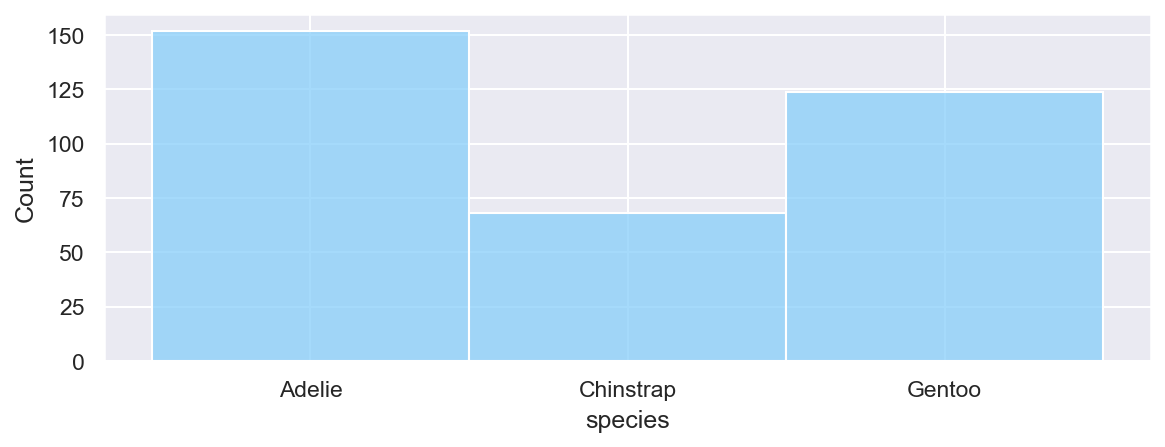

In [16]:
sns.histplot(x = "species", data = df)
plt.show()

- У нас есть 3 уникальных значения видов (Adelie, Chinstrap, Gentoo).

- Самый распространенный вид - Адели (152).

- Наименее распространенный вид — Субантарктический пингвин (68).

__Остров__

In [17]:
df.island.describe()

count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object

In [18]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [19]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

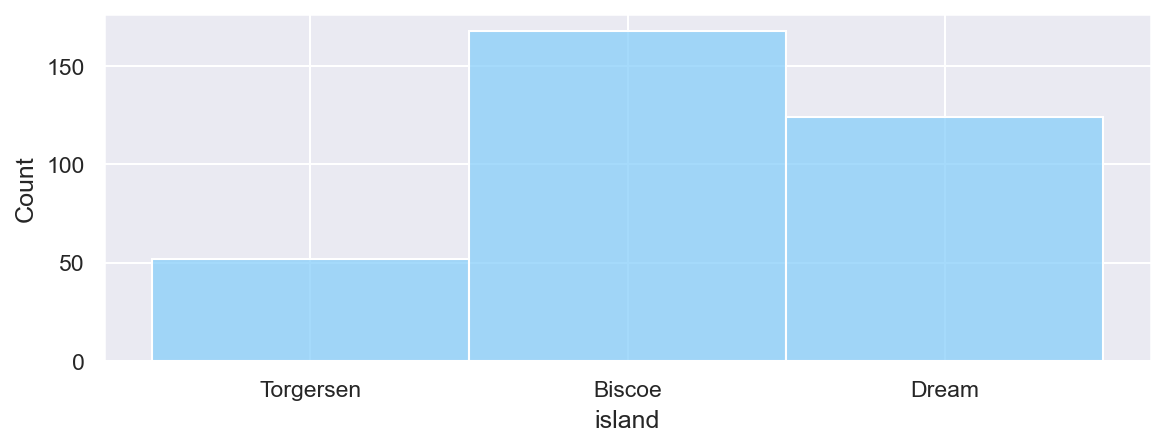

In [20]:
sns.histplot(x = "island", data = df)
plt.show()

- В этом наборе данных у нас есть 3 уникальных значения острова (Биско, Дрим, Торгерсен).

- Остров Биско — это место, где обитает больше всего пингвинов (168).

- Остров Торгерсен — место, где пингвинов меньше всего (52).

__Пол__

In [21]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

- Есть "." значение в столбце пола, найду это значение.

In [22]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


- Значению в строке с идентификатором 336 присвою женский пол.

In [23]:
df.at[336,'sex'] = 'FEMALE'

In [24]:
df["sex"].isnull().sum()

10

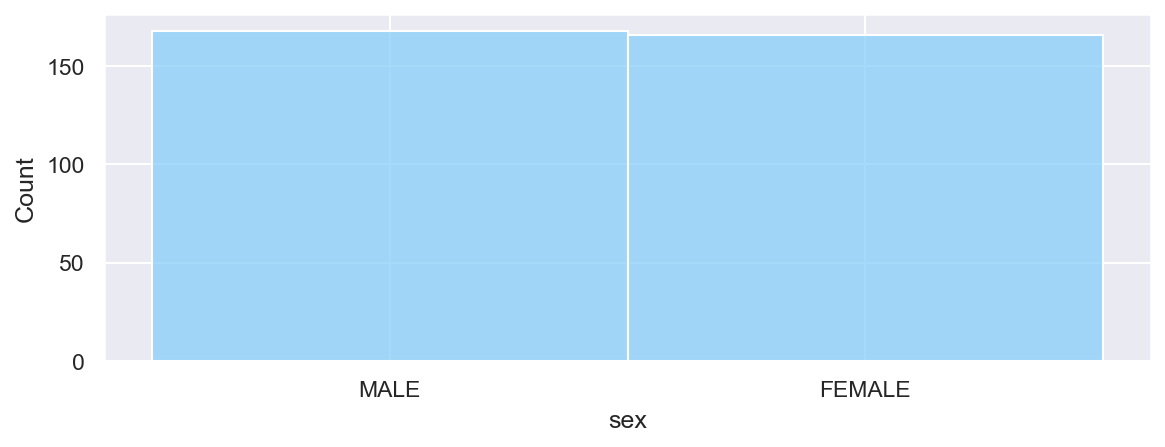

In [25]:
sns.histplot(x = "sex", data= df)
plt.show()

- Количество пингвинов-самцов и пингвинов-самок близко друг к другу, количество пингвинов-самцов на 3 больше, чем пингвинов-самок.

- Также в данных есть 10 недостающих значений о поле.

__2) Числовые переменные__

In [28]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Частота")
    plt.title("Гистограмма {}".format(variable))
    plt.show()

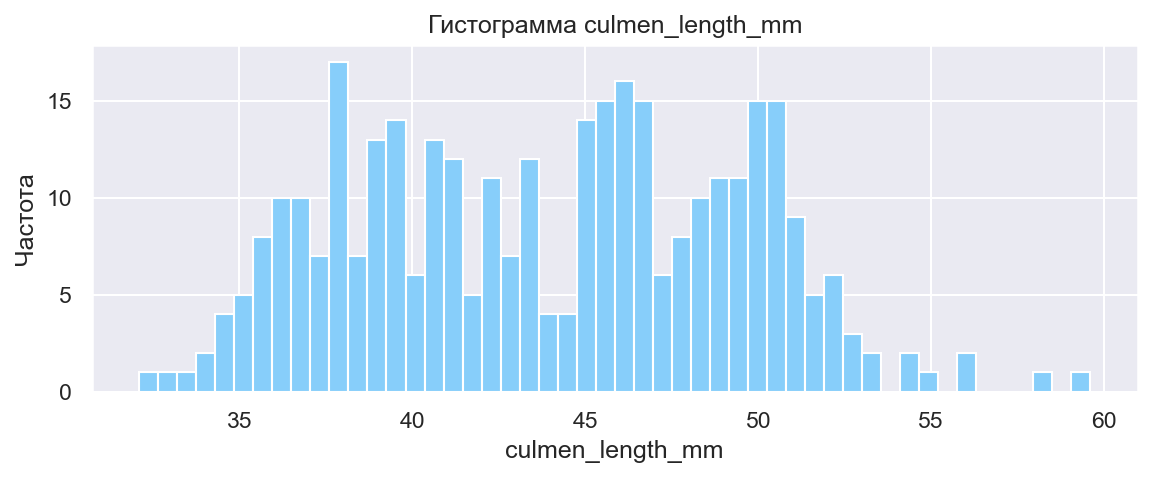

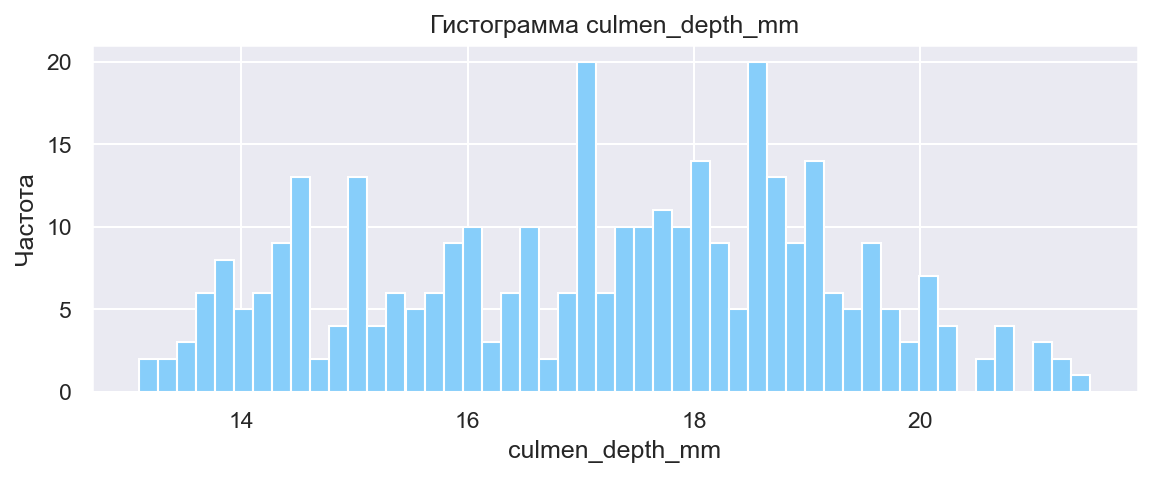

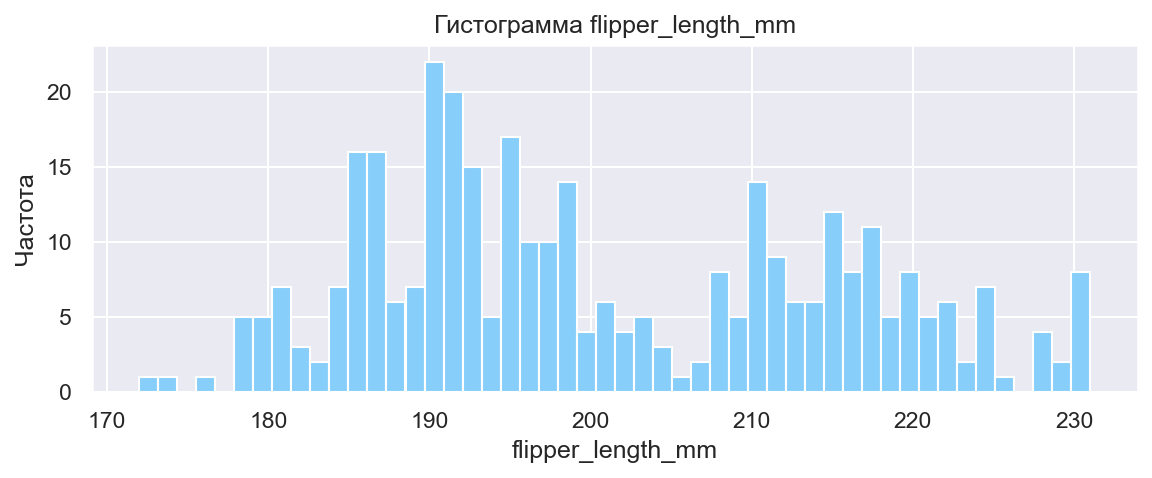

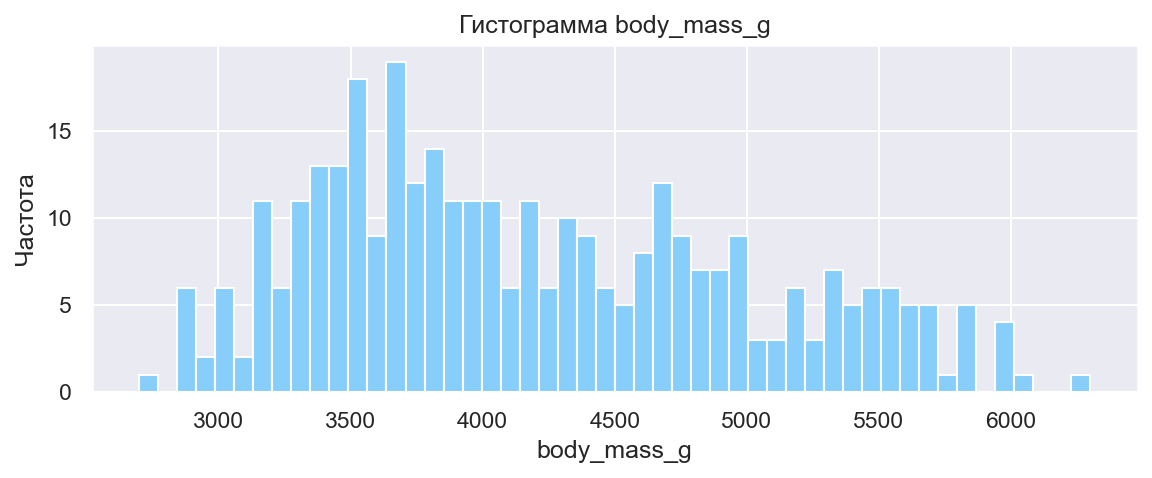

In [29]:
numeric_variables = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for c in numeric_variables:
    plot_hist(c)

## Базовый анализ данных

- вид -- длина надклювья

- вид -- толщина надклювья

- вид -- длина плавника

- вид -- масса тела


- остров -- длина надклювья

- остров -- толщина надклювья

- остров -- длина плавника

- остров -- масса тела

In [30]:
#вид -- длина надклювья
df[["species","culmen_length_mm"]].groupby(["species"],as_index = False).\
mean().sort_values(by ="culmen_length_mm", ascending = False)

,species,culmen_length_mm
1,Chinstrap,48.833824
2,Gentoo,47.504878
0,Adelie,38.791391


In [31]:
#вид -- толщина надклювья
df[["species","culmen_depth_mm"]].groupby(["species"],as_index = False).\
mean().sort_values(by ="culmen_depth_mm", ascending = False)

,species,culmen_depth_mm
1,Chinstrap,18.420588
0,Adelie,18.346358
2,Gentoo,14.982114


- У Антарктических пингвинов длина надклювья и толщина надклювья в среднем больше чем у всех остальных видов.

In [32]:
#вид -- длина плавника
df[["species","flipper_length_mm"]].groupby(["species"],as_index = False).\
mean().sort_values(by ="flipper_length_mm", ascending = False)

,species,flipper_length_mm
2,Gentoo,217.186992
1,Chinstrap,195.823529
0,Adelie,189.953642


In [33]:
#вид -- масса тела
df[["species","body_mass_g"]].groupby(["species"],as_index = False).\
mean().sort_values(by ="body_mass_g", ascending = False)

,species,body_mass_g
2,Gentoo,5076.016260
1,Chinstrap,3733.088235
0,Adelie,3700.662252


- Субантарктические пингвины весят больше и у них самый длинный плавник, у Адели самые низкие характеристики веса и размера плавника.

In [34]:
#остров -- длина надклювья
df[["island","culmen_length_mm"]].groupby(["island"],as_index = False).\
mean().sort_values(by ="culmen_length_mm", ascending = False)

,island,culmen_length_mm
0,Biscoe,45.257485
1,Dream,44.167742
2,Torgersen,38.950980


In [35]:
#остров -- толщина надклювья
df[["island","culmen_depth_mm"]].groupby(["island"],as_index = False).\
mean().sort_values(by ="culmen_depth_mm", ascending = False)

,island,culmen_depth_mm
2,Torgersen,18.429412
1,Dream,18.344355
0,Biscoe,15.874850


In [36]:
#остров -- длина плавника
df[["island","flipper_length_mm"]].groupby(["island"],as_index = False).\
mean().sort_values(by ="flipper_length_mm", ascending = False)

,island,flipper_length_mm
0,Biscoe,209.706587
1,Dream,193.072581
2,Torgersen,191.196078


In [37]:
#остров -- масса тела
df[["island","body_mass_g"]].groupby(["island"],as_index = False).\
mean().sort_values(by ="body_mass_g", ascending = False)

,island,body_mass_g
0,Biscoe,4716.017964
1,Dream,3712.903226
2,Torgersen,3706.372549


- Пингвины, которые живут на острове Биско имеют самые длинные надклювья, плавники и самую большую массу тела.

## Обнаружение выбросов